In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Model
from tqdm import tqdm
from keras.layers import Input, Dense , Reshape, LSTM
from keras.layers import Input, Dense, Reshape, LSTM
from keras.optimizers import Adam

In [29]:
!pip install pandas_datareader

^C



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

In [33]:
# For time stamps
from datetime import datetime

In [32]:
yf.pdr_override()

In [34]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.388997,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.455573,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.593858,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.725513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.705328,394024400
...,...,...,...,...,...,...
2024-11-11,225.000000,225.699997,221.500000,224.229996,224.229996,42005600
2024-11-12,224.550003,225.589996,223.360001,224.229996,224.229996,40398300
2024-11-13,224.009995,226.649994,222.759995,225.119995,225.119995,48566200


In [35]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3078

In [36]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00332215],
       [0.00367683],
       [0.00441348],
       ...,
       [0.94895127],
       [0.96288185],
       [0.94841205]])

In [37]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00332215, 0.00367683, 0.00441348, 0.00511482, 0.00500729,
       0.00524963, 0.00513889, 0.00495273, 0.00469915, 0.00548395,
       0.00619171, 0.00597344, 0.00477779, 0.00591888, 0.00479545,
       0.00900831, 0.00868252, 0.00910782, 0.01002743, 0.01058432,
       0.01053778, 0.01036606, 0.0110979 , 0.0117864 , 0.01256638,
       0.01382623, 0.01647271, 0.01651284, 0.01798614, 0.0190871 ,
       0.01719492, 0.01792354, 0.0179091 , 0.01995214, 0.01966165,
       0.02019929, 0.02116544, 0.02170309, 0.02325182, 0.02438006,
       0.02470586, 0.02481981, 0.02289072, 0.02242529, 0.02249431,
       0.02430785, 0.02481821, 0.02591436, 0.02849824, 0.03194558,
       0.0313004 , 0.03130201, 0.03379442, 0.03457441, 0.03401911,
       0.03351196, 0.03298395, 0.0347381 , 0.03594178, 0.03644572])]
[0.03520031440172121]

[array([0.00332215, 0.00367683, 0.00441348, 0.00511482, 0.00500729,
       0.00524963, 0.00513889, 0.00495273, 0.00469915, 0.00548395,
       0.00619171, 0.00597344, 0.00

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


3018/3018 [==============================] - 31s 10ms/step - loss: 8.7899e-04


In [39]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 9ms/step


11.713646418187158

C:\Users\Kaneki\AppData\Local\Temp\ipykernel_7268\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


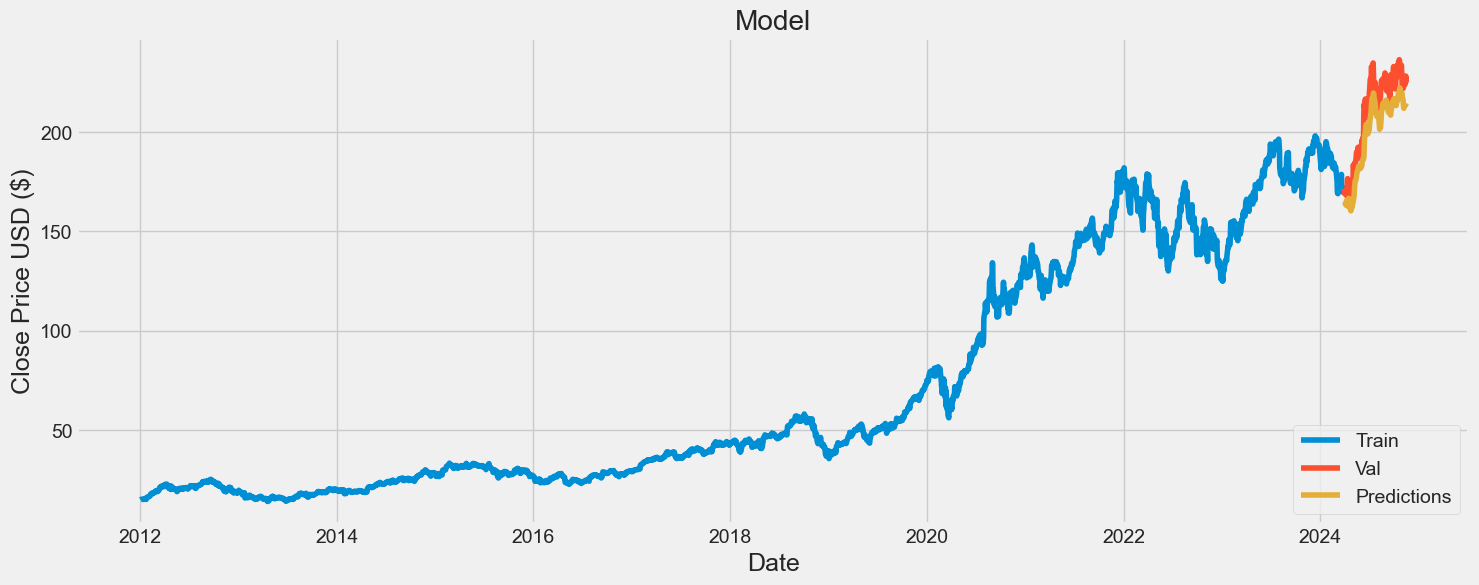

In [40]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [41]:

# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-03-28,171.479996,165.322556
2024-04-01,170.029999,165.131348
2024-04-02,168.839996,164.762421
2024-04-03,169.649994,164.175995
2024-04-04,168.820007,163.801361
...,...,...
2024-11-11,224.229996,213.531311
2024-11-12,224.229996,213.811172
2024-11-13,225.119995,213.801300
